## Prediction of Fashion class using MNIST-Fashion Dataset

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

###  Import Fashion Dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images , train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### preprocess Data

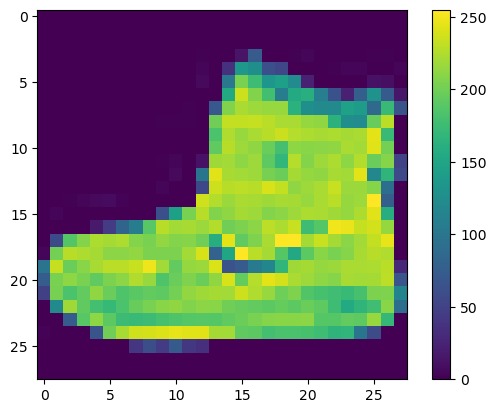

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale the values to 0 to 1 by dividing it by 255.

In [7]:
train_images = train_images/255.0
test_images = test_images/255.0

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

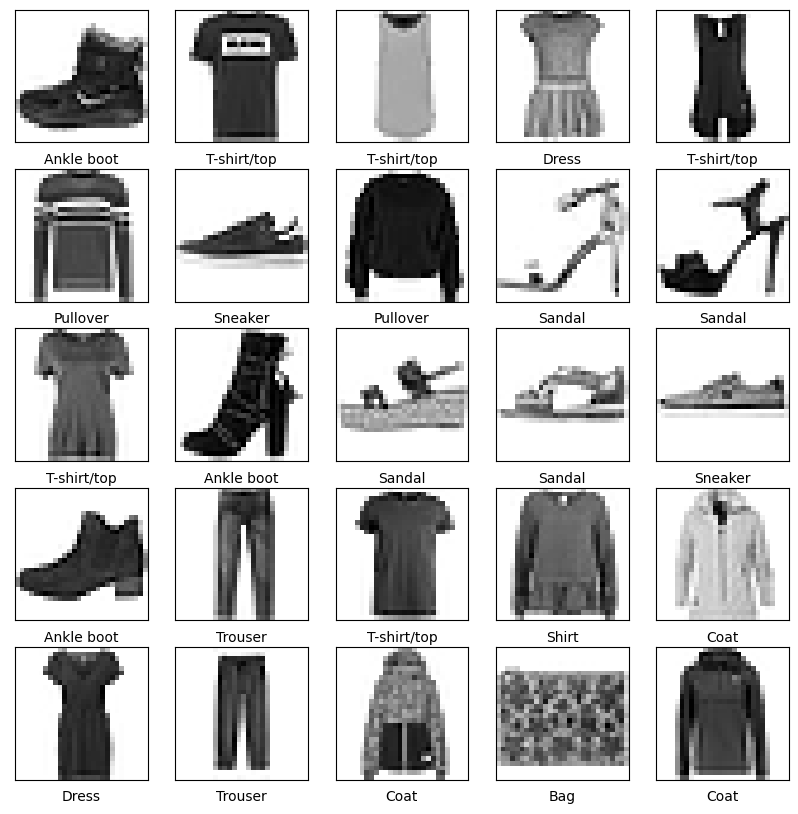

In [10]:
#Visualize

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Building Model

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [14]:
%%time
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Wall time: 4.5 ms


In [18]:
%%time
model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2305 - accuracy: 0.9155
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2230 - accuracy: 0.9169
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2165 - accuracy: 0.9192
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2098 - accuracy: 0.9208
Epoch 5/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2052 - accuracy: 0.9226
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1979 - accuracy: 0.9270
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1947 - accuracy: 0.9282
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1891 - accuracy: 0.9290
Epoch 9/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1822 - accuracy: 0.9320
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.180

### Evaluate Accuracy

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\n accuracy:', test_acc)

313/313 - 1s - loss: 0.5493 - accuracy: 0.8900 - 825ms/epoch - 3ms/step

 accuracy: 0.8899999856948853


## Make Predictions

In [21]:
# adding softmax layer to convert the model's linear output to probabilities.

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [22]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [23]:
predictions[0]

array([1.7562943e-19, 3.8350398e-22, 1.2056504e-20, 6.3460611e-22,
       1.5654716e-23, 7.3877855e-09, 1.6466092e-20, 5.2717246e-06,
       5.4799859e-21, 9.9999475e-01], dtype=float32)

In [24]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
               color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

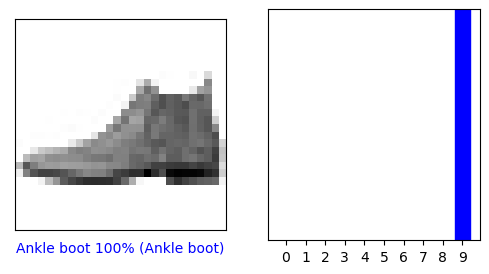

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

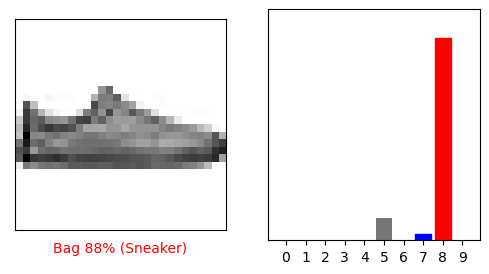

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

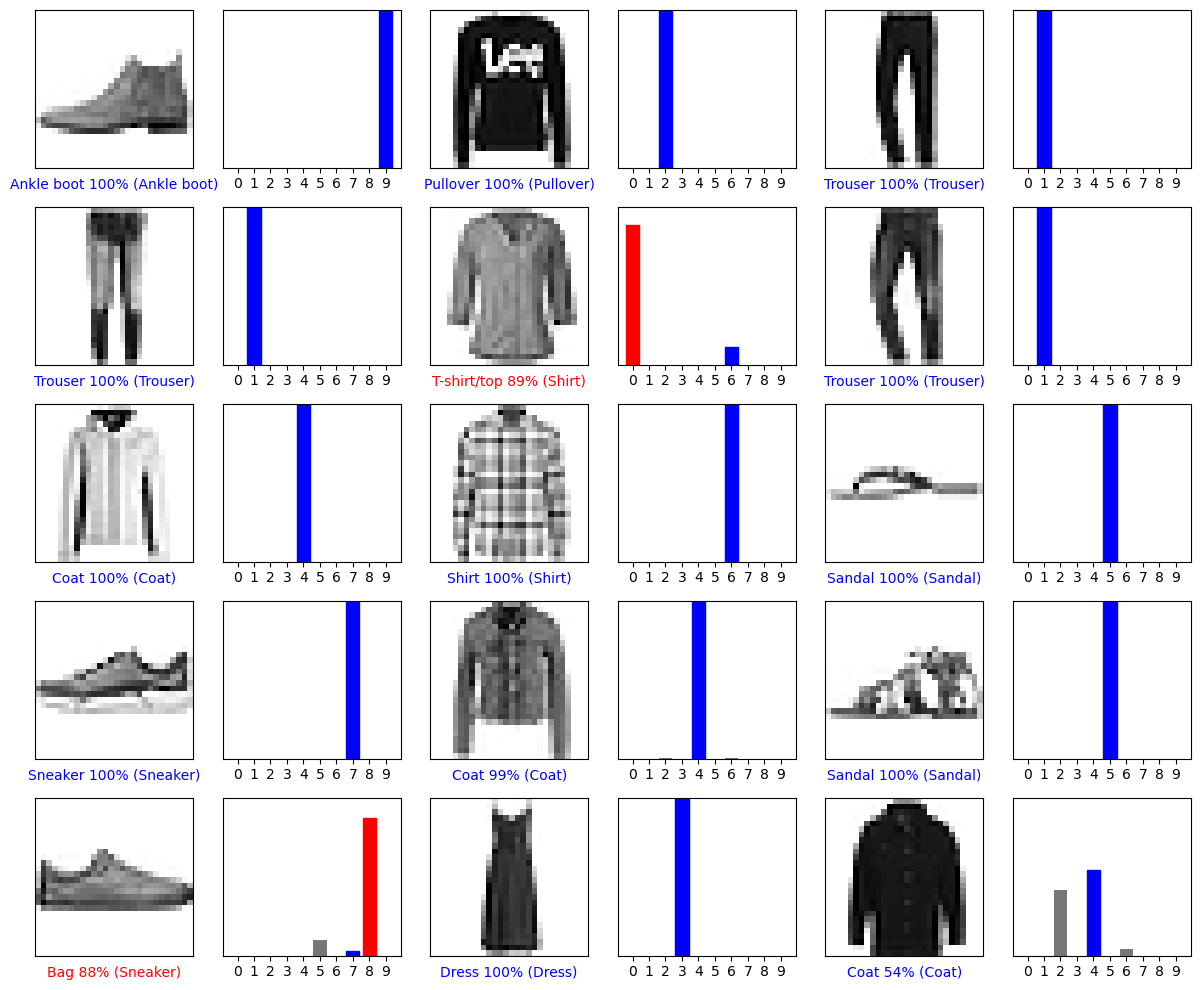

In [27]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[33]),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])